# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Velizha Sandy Kusuma
- **Email:** A182XBM490@devacademy.id
- **ID Dicoding:** A182XBM490

## Menentukan Pertanyaan Bisnis

- **Bagaimana pola penggunaan sepeda per jam antara hari kerja dan akhir pekan?**
- **Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda per jam?**

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#!/bin/bash
!kaggle datasets download lakshmi25npathi/bike-sharing-dataset
!unzip /content/bike-sharing-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 105MB/s]
Archive:  /content/bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [3]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour = pd.read_csv('hour.csv')
hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Merge data on 'dteday'
df = pd.merge(hour, day, on='dteday', suffixes=('_hour', '_day'))

# Select relevant columns (removing redundant daily data)
selected_columns = [
    'dteday', 'hr', 'season_hour', 'yr_hour', 'mnth_hour', 'weekday_hour',
    'workingday_hour', 'holiday_hour', 'weathersit_hour', 'temp_hour', 'atemp_hour',
    'hum_hour', 'windspeed_hour', 'casual_hour', 'registered_hour', 'cnt_hour'
]
df = df[selected_columns]

# Rename columns for clarity
df.rename(columns={
    'season_hour': 'season', 'yr_hour': 'year', 'mnth_hour': 'month',
    'weekday_hour': 'weekday', 'workingday_hour': 'workingday',
    'holiday_hour': 'holiday', 'weathersit_hour': 'weathersit',
    'temp_hour': 'temp', 'atemp_hour': 'atemp',
    'hum_hour': 'humidity', 'windspeed_hour': 'windspeed',
    'casual_hour': 'casual', 'registered_hour': 'registered',
    'cnt_hour': 'total_rentals'
}, inplace=True)

df.head()

,dteday,hr,season,year,month,weekday,workingday,holiday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rentals
0,2011-01-01,0,1,0,1,6,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,1,0,1,6,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,2,1,0,1,6,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,3,1,0,1,6,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,4,1,0,1,6,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- terdapat 2 dataset: hour.cvs dan day.csv yang digabungkan dengan menggunakan kolom dteday agar menyesuaikan tanggal
- menganalisis pola penyewaan sepeda per jam dalam satu hari dan mengeksplorasi bagaimana kondisi cuaca dan tipe hari

### Assessing Data

In [6]:
df.shape

(17379, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dteday         17379 non-null  object 
 1   hr             17379 non-null  int64  
 2   season         17379 non-null  int64  
 3   year           17379 non-null  int64  
 4   month          17379 non-null  int64  
 5   weekday        17379 non-null  int64  
 6   workingday     17379 non-null  int64  
 7   holiday        17379 non-null  int64  
 8   weathersit     17379 non-null  int64  
 9   temp           17379 non-null  float64
 10  atemp          17379 non-null  float64
 11  humidity       17379 non-null  float64
 12  windspeed      17379 non-null  float64
 13  casual         17379 non-null  int64  
 14  registered     17379 non-null  int64  
 15  total_rentals  17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [8]:
df.isna().sum()

,0
dteday,0
hr,0
season,0
year,0
month,0
weekday,0
workingday,0
holiday,0
weathersit,0
temp,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,hr,season,year,month,weekday,workingday,holiday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rentals
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,2.501640,0.502561,6.537775,3.003683,0.682721,0.028770,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,6.914405,1.106918,0.500008,3.438776,2.005771,0.465431,0.167165,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,2.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,12.000000,3.000000,1.000000,7.000000,3.000000,1.000000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,18.000000,3.000000,1.000000,10.000000,5.000000,1.000000,0.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,23.000000,4.000000,1.000000,12.000000,6.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


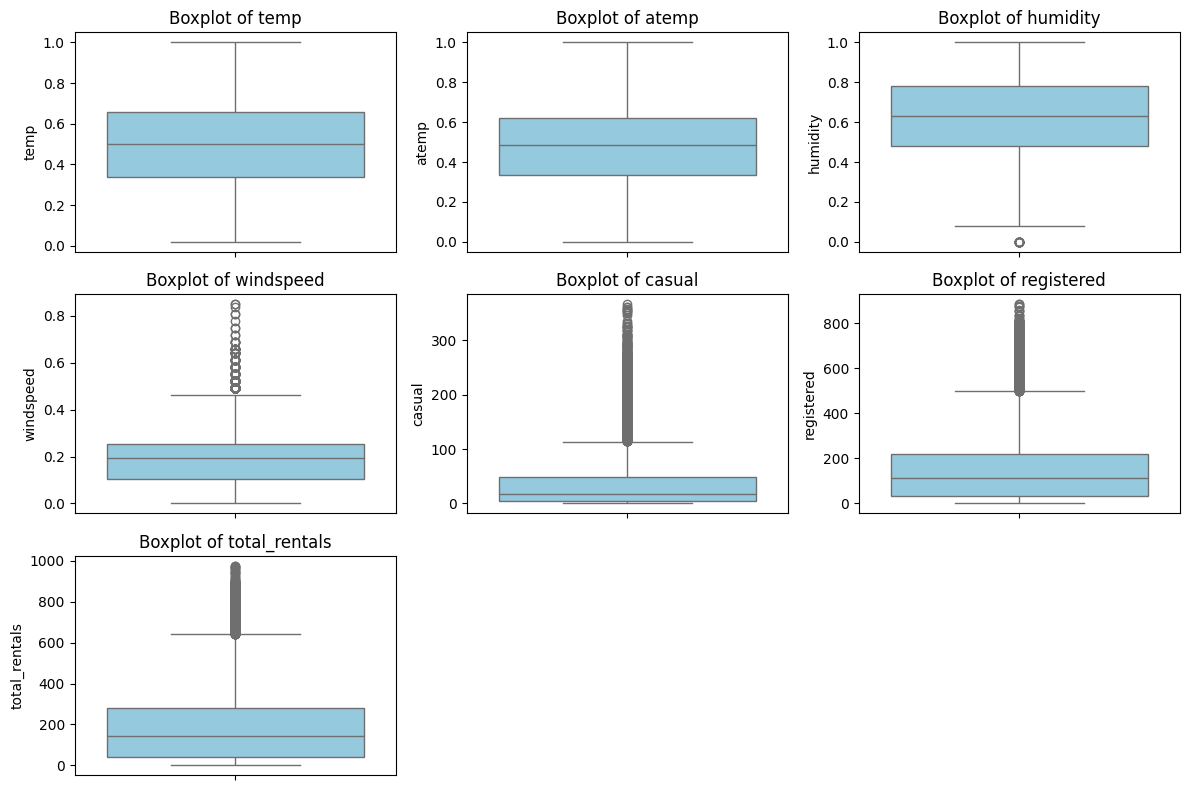

In [11]:
# Pilih hanya kolom numerik yang relevan untuk pengecekan outlier
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_rentals']

# Atur ukuran figure
plt.figure(figsize=(12, 8))

# Loop untuk membuat boxplot setiap kolom numerik
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Buat grid subplot 3x3
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

# Atur layout agar tidak bertumpukan
plt.tight_layout()
plt.show()

**Insight:**
- data tidak memiliki nilai null dan duplikasi
- terdapat beberapa outlier namun karena data outlier tersebut bersangkutan dengan cuaca maka outlier tidak dihapus untuk melihat pengaruh cuaca terhadap penyewaan sepeda

### Cleaning Data

In [12]:
df['dteday'] = pd.to_datetime(df['dteday'])

**Insight:**
- mengonversi kolom dteday dari object menjadi date time

## Exploratory Data Analysis (EDA)

### Explore ...

<ipython-input-6-8b8ba8bf2ffa>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='total_rentals', data=df, ci=None, palette='coolwarm')
<ipython-input-6-8b8ba8bf2ffa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='total_rentals', data=df, ci=None, palette='coolwarm')


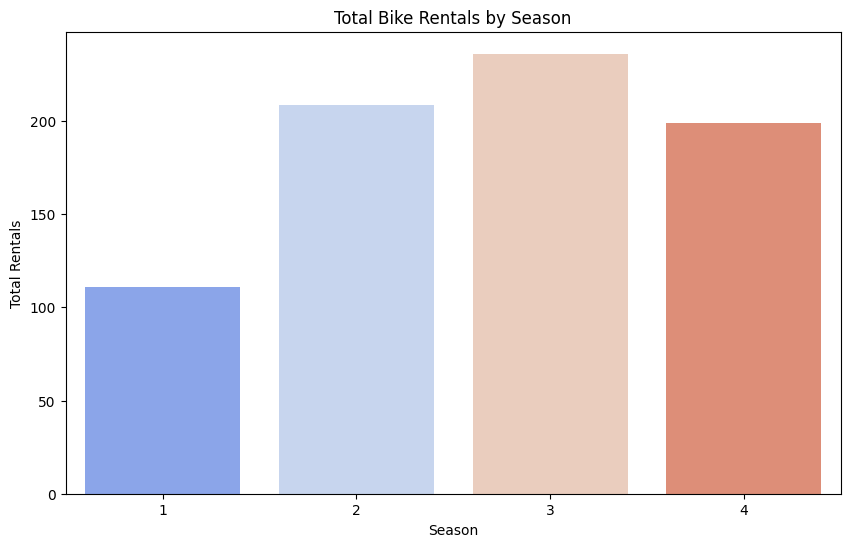

In [6]:
#season(1:springer, 2:summer, 3:fall, 4:winter)
#melihat total rental dari setiap musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='total_rentals', data=df, ci=None, palette='coolwarm')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Season')
plt.show()

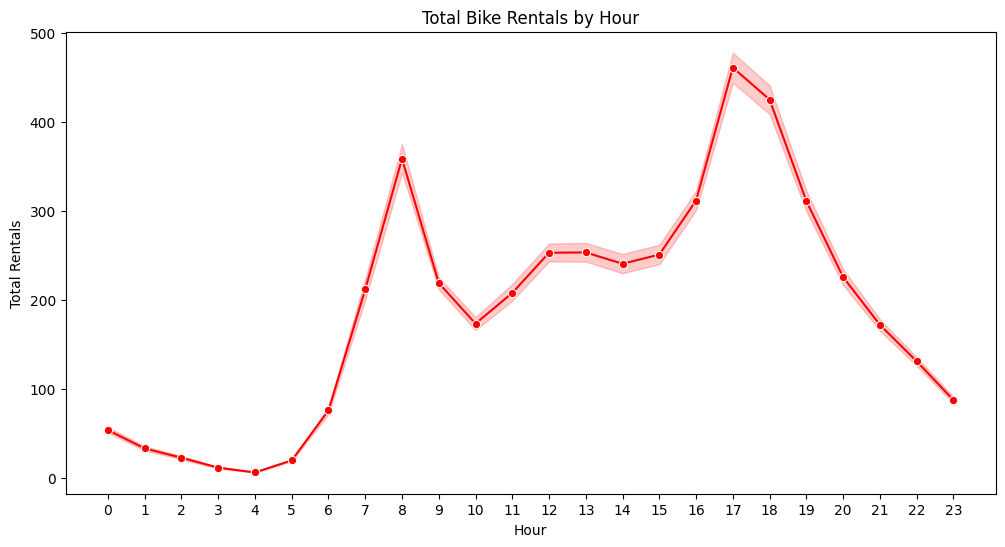

In [7]:
#melihat pola penyewaan sepeda berdasarkan jam untuk melihat pada jam berapa penyewaan meningkat
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='total_rentals', data=df, marker='o', color='r')
plt.xlabel('Hour')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Hour')
plt.xticks(range(0, 24))
plt.show()

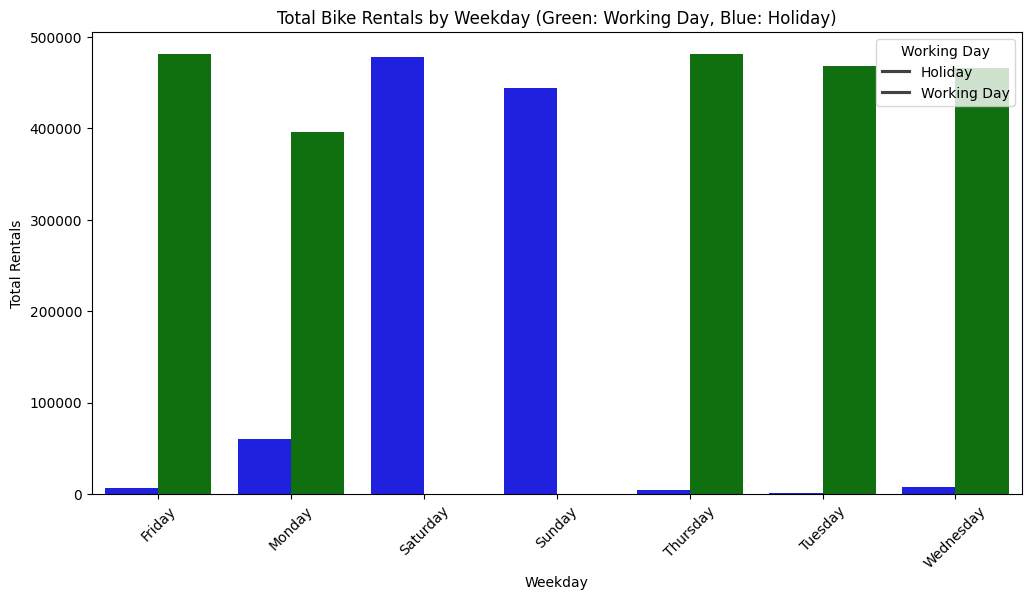

In [8]:
# Mapping hari weekday dan weekend (holiday)
weekday_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['weekday_name'] = df['weekday'].map(lambda x: weekday_labels[x])

# Define colors based on working day and holiday
colors = ['green' if wd == 1 else 'blue' for wd in df['workingday']]

# Aggregate rentals by weekday
df_weekday = df.groupby(['weekday_name', 'workingday'])['total_rentals'].sum().reset_index()

# Set figure size
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday_name', y='total_rentals', hue='workingday', data=df_weekday, palette={1: 'green', 0: 'blue'})
plt.xlabel("Weekday")
plt.ylabel("Total Rentals")
plt.title("Total Bike Rentals by Weekday (Green: Working Day, Blue: Holiday)")
plt.xticks(rotation=45)
plt.legend(title="Working Day", labels=["Holiday", "Working Day"])
plt.show()

**Insight:**
- sewa sepeda paling tinggi pada musim gugur
- sewa sepeda meningkat pada saat jam berangkat kerja dan pulang kerja
- Kamis dan Jumat paling banyak sewa sepeda pada weekday sedangkan weekend paling banyak di hari sabtu

## Visualization & Explanatory Analysis

### Pertanyaan 1:
**Bagaimana pola penggunaan sepeda per jam antara hari kerja dan akhir pekan?**

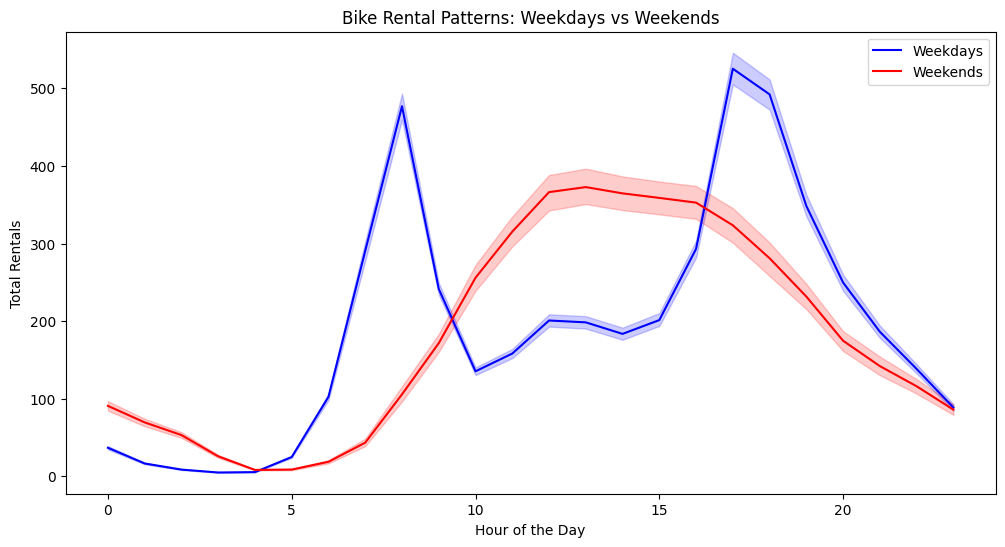

In [9]:
# Visualizing rental patterns by hour on weekdays vs weekends (holiday)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['workingday'] == 1], x='hr', y='total_rentals', label='Weekdays', color='blue')
sns.lineplot(data=df[df['workingday'] == 0], x='hr', y='total_rentals', label='Weekends', color='red')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rentals")
plt.title("Bike Rental Patterns: Weekdays vs Weekends")
plt.legend()
plt.show()

### Pertanyaan 2:
**Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda per jam?**

<ipython-input-10-230296d2d1e7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_label', y='total_rentals', data=df_weather, palette='coolwarm')


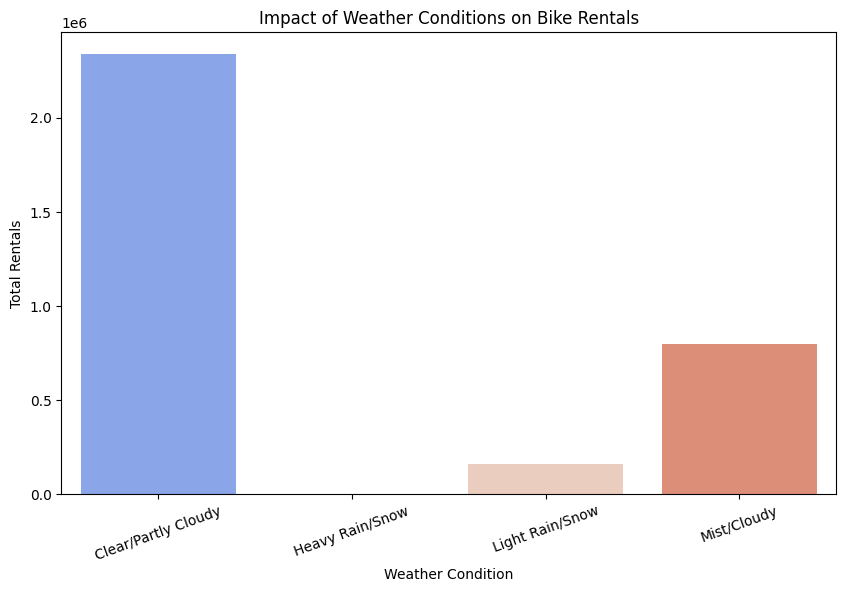

In [10]:
# Mapping weathersit
weather_labels = {
    1: "Clear/Partly Cloudy",
    2: "Mist/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
}
df['weather_label'] = df['weathersit'].map(weather_labels)

# Aggregate total rentals by weather condition
df_weather = df.groupby('weather_label')['total_rentals'].sum().reset_index()

# Set figure size
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_label', y='total_rentals', data=df_weather, palette='coolwarm')
plt.xlabel("Weather Condition")
plt.ylabel("Total Rentals")
plt.title("Impact of Weather Conditions on Bike Rentals")
plt.xticks(rotation=20)
plt.show()

**Insight:**
- pola penyewaan sepeda paling banyak pada weekday pada jam sibuk
- tidak ada penyewa sepeda ketika musim hujan / salju

## Analisis Lanjutan (Opsional)

In [13]:
# Pastikan kolom dteday dalam format datetime
df["dteday"] = pd.to_datetime(df["dteday"])

# Menampilkan tanggal minimal dan maksimal
min_date = df["dteday"].min()
max_date = df["dteday"].max()

print("Tanggal paling awal:", min_date)
print("Tanggal paling akhir:", max_date)

Tanggal paling awal: 2011-01-01 00:00:00
Tanggal paling akhir: 2012-12-31 00:00:00


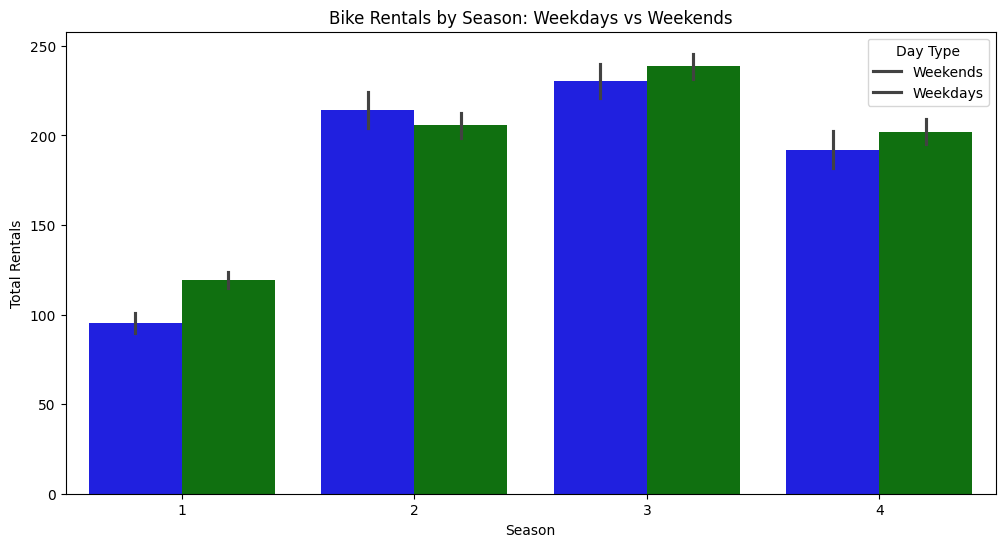

In [11]:
# --- Visualizing rental patterns by season and working day ---
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='season', y='total_rentals', hue='workingday', palette={1: 'green', 0: 'blue'})
plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.title("Bike Rentals by Season: Weekdays vs Weekends")
plt.legend(title="Day Type", labels=["Weekends", "Weekdays"])
plt.show()

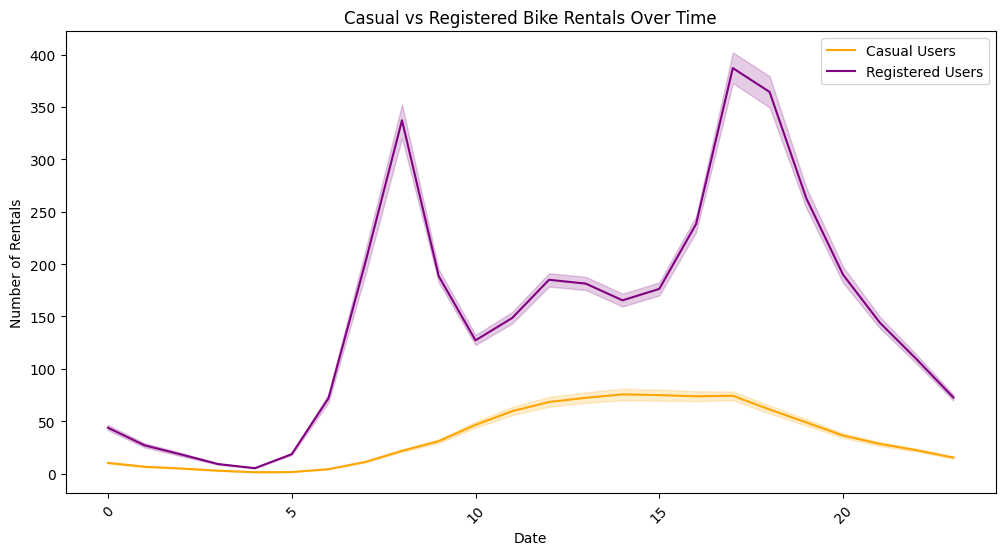

In [12]:
# --- Visualizing casual vs registered users over time ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hr', y='casual', label='Casual Users', color='orange')
sns.lineplot(data=df, x='hr', y='registered', label='Registered Users', color='purple')
plt.xlabel("Date")
plt.ylabel("Number of Rentals")
plt.title("Casual vs Registered Bike Rentals Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Insight:**
- data yang digunakan adalah data dari tahun 2011 awal - 2012 akhir
- musim gugur adalah musim yang paling banyak penyewa sepeda
- penyewa yang telah terdaftar lebih banyak daripada casual

## Conclusion

- Conclusion pertanyaan 1: penyewa sepeda paling banyak terdapat pada jam sibuk seperti jam berangkat kerja dan pulang kerja
- Conclution pertanyaan 2: cuaca yang cerah memengaruhi peningkatan jumlah sewa karena ketika terjadi hujan dan turun salju tidak ada penyewa sepeda

In [14]:
df.to_csv('BikeSharing_Merge.csv')